# Three Neuron Inhibitory Phase Plots

The purpose of this notebook is to investigate a relatively simple neural network of only three neurons: two excitatory ones interacting only indirectly by direct excitation of the third, inhibitory. We aim to study multistability as a function of the 5 relevant parameters: namey the (symmetric) biases and weights.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [786]:
def rl(x):
    return np.maximum(x,0)

def evolve(I, W, b, alpha=0.01):
    steps = len(I[0, :])
    for ii in range(1,steps):
        I[:,ii] = (1-alpha)*I[:,ii-1] + alpha*(W.dot(rl(I[:,ii-1])) + b)

def neuronplot(I, b, color='k'):
    steps = len(I[0,:])
    plt.plot(I[0], color=color)
    #plt.plot(-np.ones(steps).reshape([steps,1]).dot(b.reshape([1,len(b)])), color=color)
    
def phaseplot(I, b):
    plt.figure()
    plt.plot(I[0,:],I[1,:])
    
def directedphaseplot(I, B, num=200, color='k', withBias=False):
    if withBias:
        x = I[0, :] + b[0]; y = I[1, :] + b[1]
    else:
        x = I[0, :]; y = I[1, :]
    steps = len(x)
    skip = steps/num
    x = x[::skip]; y = y[::skip]
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, color=color)

def neuronplotrl(I, b):
    steps = len(I[0,:])
    X = np.zeros((steps, len(b)))
    for i in range(len(b)):
        X[:, i] = rl(I[i,:] + b[i])
    plt.figure()   
    plt.plot(X)
    plt.plot(-np.ones(steps).reshape([steps,1]).dot(b.reshape([1,3])),'k--')    

def inhibitoryplot(I, color='k'):
    steps = len(I)
    plt.plot(I)
    
def phaseplotrl(I, b):
    steps = len(I[0,:])
    plt.figure()
    plt.plot([rl(I[0,i]+b[0]) for i in range(steps)],[rl(I[1,i]+b[1]) for i in range(steps)])


## Single self-excitatory neuron with bias

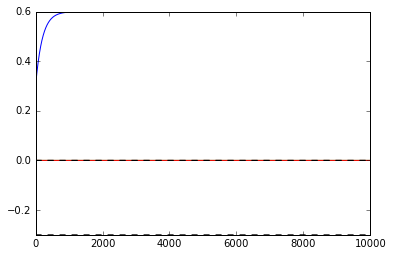

In [704]:
W = np.zeros([3,3])
steps = 10000
alpha = .01
I = np.zeros([np.shape(W)[0],steps])
init = np.array([.3,.0,.0])
I[:,0] = init

ee = .5; ei = 0; ie = 0
b1 = .3; b2 = 0; bi = 0
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
# Biases:
b = np.array([b1,b2,bi])

# Transpose W
W =  W.T
evolve(I, W, b, alpha=alpha)
# for ii in range(1,steps):
#     I[:,ii] = (1-alpha)*I[:,ii-1] + alpha*(W.dot(rl(I[:,ii-1] + b)))
    
#neuronplotrl(I, b)
neuronplot(I, b)
#directedphaseplot(I, b)
plt.show()

## An inhibitory neuron influencing two excitatory ones
### Near Criticality

In [776]:
W = np.zeros([3,3])
steps = 10000
I = np.zeros([np.shape(W)[0],steps]) 
I[:,0] = np.array([.3,.3,.0])

ee = .9; ei = 0; ie = -.5
b1 = .9; b2 = 0; bi = 1.2
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

evolve(I, W, b)
    
#neuronplotrl(I, b)
#neuronplot(I, b)
#directedphaseplot(I, b)
plt.show()

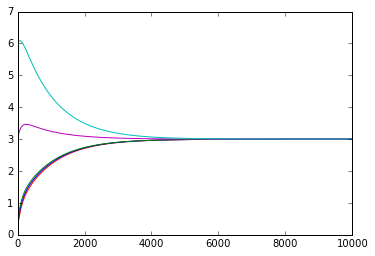

In [778]:
inits = [[.2,.3,.0],[.3,.3,.0],[.4,.0,.0],[3,.0,.0],[6,.0,.0]]
show_neuron_space(W, b, inits)

In [726]:
def show_neuron_space(W, b, inits):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        neuronplot(I, b, color=colors[num])

## Full System

In [801]:
def show_phase_space(W, b, inits, withBias=False):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        plt.axes().set_aspect('equal', 'datalim')
        plt.axhline(y=0, color='k')
        plt.axvline(x=0, color='k')
        directedphaseplot(I, b, color=colors[num], withBias=withBias)
        
def show_inhibitory_space(W, b, inits):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        inhibitoryplot(I[2, :], color=colors[num])

### Oscilliatory Solution

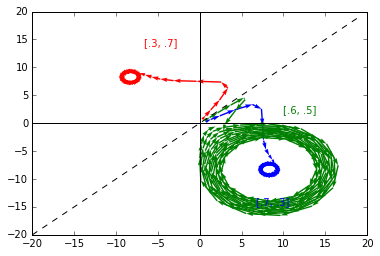

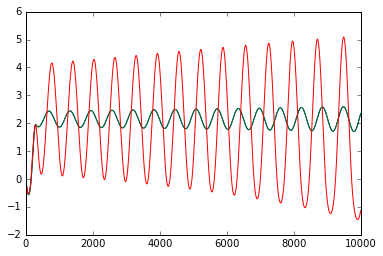

In [797]:
ee = 2; ei = .5; ie = -4
b1 = .3; b2 = .3; bi = -2
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

inits = [[.3,.7,.0],[.7,.3,.0],[.6,.5,.0], ]
show_phase_space(W, b, inits)
plt.plot(np.arange(-20,20,1),np.arange(-20,20,1), 'k--')
plt.text(-6.7,14,"[.3, .7]",color='r')
plt.text(6.7,-14.5,"[.7, .3]",color='b')
plt.text(10.,2.,"[.6, .5]",color='g')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.figure()
show_inhibitory_space(W, b, inits)

plt.show()

### Solution without oscillation

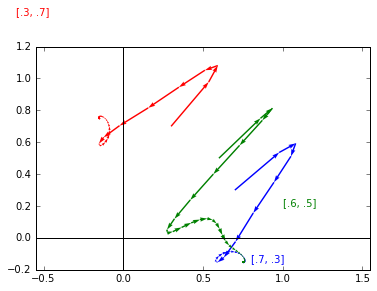

In [808]:
ee = 1.2; ei = 0.6; ie = -1.0
b1 = b2 = .6; bi = 0.3
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

inits = [[.3,.7,.0],[.7,.3,.0],[.6,.5,.0]]

show_phase_space(W, b, inits)

plt.text(-.67,1.4,"[.3, .7]",color='r')
plt.text(.8,-0.15,"[.7, .3]",color='b')
plt.text(1.0,.2,"[.6, .5]",color='g')
#neuronplot(I, b)

plt.figure()
#show_inhibitory_space(W, b, inits)


plt.show()

### Solution with no bias on the inhibitory neuron

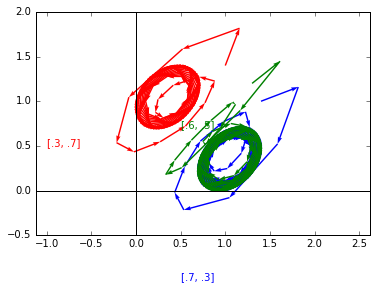

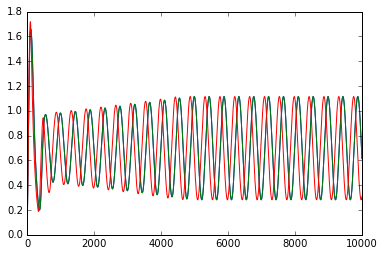

In [809]:
init = np.array([.7,.3,.0])
I[:,0] = init
ee = 2; ei = 2; ie = -1.5
b1 = b2 = 0.7; bi = 0
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

show_phase_space(W, b, inits, withBias=True)

plt.text(-1., 0.5,"[.3, .7]",color='r')
plt.text(0.5,-1.,"[.7, .3]",color='b')
plt.text(0.5,.7,"[.6, .5]",color='g')
#neuronplot(I, b)

plt.figure()
show_inhibitory_space(W, b, inits)

plt.show()

## Solution with no bias and no oscillation

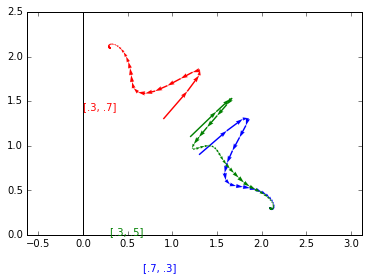

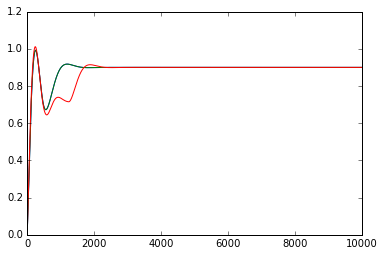

In [811]:
ee = 1.2; ei = 0.6; ie = -1.0
b1 = b2 = .6; bi = 0
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

inits = [[.3,.7,.0],[.7,.3,.0],[.6,.5,.0]]

show_phase_space(W, b, inits, withBias=True)

plt.text(0,1.4,"[.3, .7]",color='r')
plt.text(.67,-.4,"[.7, .3]",color='b')
plt.text(0.3,.0,"[.3, .5]",color='g')
#neuronplot(I, b)

plt.figure()
show_inhibitory_space(W, b, inits)

plt.show()